In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

In [2]:
df = pd.read_csv('Housing.csv', index_col='Unnamed: 0')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [3]:
df.shape

(546, 12)

In [4]:
df.describe(include='all')

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546,546,546,546,546,546.000000,546
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,469,449,355,521,373,NaN,418
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,NaN,NaN,NaN,NaN,NaN,0.692308,NaN
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,NaN,NaN,NaN,NaN,NaN,0.861307,NaN
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 1 to 546
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 55.5+ KB


In [6]:
df.corr()

,price,lotsize,bedrooms,bathrms,stories,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.324066,0.178178
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.043412
garagepl,0.383302,0.352872,0.139117,0.178178,0.043412,1.000000


In [7]:
df.driveway = df.driveway.eq('yes').mul(1)
df.recroom = df.recroom.eq('yes').mul(1)
df.fullbase = df.fullbase.eq('yes').mul(1)
df.gashw = df.gashw.eq('yes').mul(1)
df.airco = df.airco.eq('yes').mul(1)
df.prefarea = df.prefarea.eq('yes').mul(1)

In [8]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [9]:
# y = df['price']
# x = df.drop(['price'], axis=1)
x = df[['lotsize']] #,'bedrooms','bathrms'
y = df['price']

In [10]:
print(x.shape, y.shape)
print(x.T.shape)

(546, 1) (546,)
(1, 546)


In [11]:
w = np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))

In [12]:
h = np.dot(x,w)
h.shape

(546,)

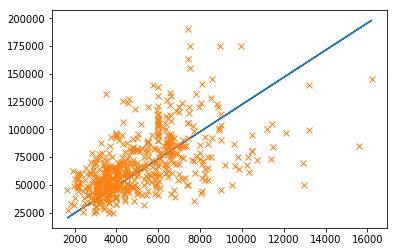

In [13]:
plt.plot(x,h,x,y,'x')
plt.show()

In [14]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()


In [15]:
# x1 = np.array(x)
# x2 = x1[:,1]
# x1 = x1[:,0]
# print(x1.shape, x2.shape)

# plt.plot(x1,h,'og',x1,y,'x')
# plt.show()
# plt.plot(x2,h,'og',x2,y,'x')
# plt.show()
# # ax = plt.axes(projection='3d')
# # ax.plot3D(x1,x2,h,'x')
# # plt.show()

In [16]:
print(h.shape, y.shape)

(546,) (546,)


In [17]:
error = np.sum((h-y)**2)/(h.size)
print(error)
acc = np.sum((np.abs(np.divide((h-y),y))))/h.size
print(acc)

682559306.0737922
0.2836899349357931


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
clf = LinearRegression(normalize=True)
clf.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [20]:
clf.score(x,y)

0.28707700259705604

In [21]:
h_skl = clf.predict(x)

In [22]:
(np.sum(h_skl-y)**2)/h_skl.size

3.971436529250932e-20

## Gradient Descent

In [23]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [24]:
# x['lotsize'] = (x['lotsize']-np.min(x['lotsize']))/(np.max(x['lotsize'])-np.min(x['lotsize']))
x = (x-x.min())/(x.max()-x.min())

In [25]:
y = (y-y.min())/(y.max()-y.min())

In [26]:
# p = list(x)
# p.count(1)
print(x)


      lotsize
1    0.288660
2    0.161512
3    0.096907
4    0.343643
5    0.323711
6    0.172509
7    0.153265
8    0.172509
9    0.216495
10   0.264605
11   0.381443
12   0.092784
13   0.003436
14   0.084536
15   0.134021
16   0.105498
17   0.113402
18   0.243986
19   0.123711
20   0.160550
21   0.215464
22   0.196564
23   0.161512
24   0.156976
25   0.227491
26   0.092784
27   0.147766
28   0.227491
29   0.092784
30   0.195876
..        ...
517  0.298969
518  0.298969
519  0.315464
520  0.298969
521  0.414433
522  0.298969
523  0.298969
524  0.298969
525  0.298969
526  0.400344
527  0.240550
528  0.321306
529  0.298969
530  0.298969
531  0.298969
532  0.367698
533  0.773196
534  0.414845
535  0.230241
536  0.285223
537  0.298969
538  0.216495
539  0.333333
540  0.389691
541  0.335052
542  0.216495
543  0.298969
544  0.298969
545  0.298969
546  0.298969

[546 rows x 1 columns]


In [27]:
print(y)

1      0.103030
2      0.081818
3      0.148485
4      0.215152
5      0.218182
6      0.248485
7      0.248485
8      0.266667
9      0.356364
10     0.384848
11     0.393939
12     0.033333
13     0.012121
14     0.066667
15     0.072727
16     0.078182
17     0.093939
18     0.095455
19     0.121212
20     0.121212
21     0.142424
22     0.247879
23     0.078182
24     0.078788
25     0.103030
26     0.104848
27     0.112121
28     0.115152
29     0.118182
30     0.120606
         ...   
517    0.424242
518    0.433333
519    0.460606
520    0.466667
521    0.472727
522    0.484848
523    0.503030
524    0.515152
525    0.533333
526    0.575758
527    0.484848
528    0.490909
529    0.500000
530    0.503030
531    0.537879
532    0.575758
533    0.272727
534    0.278788
535    0.345455
536    0.345455
537    0.348485
538    0.351515
539    0.357576
540    0.363636
541    0.363636
542    0.403030
543    0.418182
544    0.472727
545    0.484848
546    0.484848
Name: price, Length: 546

In [28]:
print(x.shape, y.shape)
m = x.shape[0]
n = x.shape[1]
print(m,n)

t = np.ones((m,1))
x = np.hstack((t,x))
x.shape

(546, 1) (546,)
546 1


(546, 2)

In [29]:
w = np.random.rand(1,n+1)
y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print(x.shape, w.shape, y.shape)
alpha = 0.001

print(np.sum(np.dot(x,w.T)-y,axis=0))
print("....")

t=10000
while(t):
    h = np.dot(x,w.T)
#     print(h.shape, y.shape, x[:,0:1].shape,(h-y).shape)
#     print(np.sum((h-y)*x[:,0:1],axis=0).shape)
#     print(w[:,0].shape)
    temp0 = w[:,0] - alpha*(1/m)*(np.sum( (h-y)*x[:,0:1], axis=0))
    temp1 = w[:,1] - alpha*(1/m)*(np.sum( (h-y)*x[:,1:2], axis=0))
    w[:,0] = temp0
    w[:,1] = temp1
    t-=1

(546, 2) (1, 2) (546, 1)
[447.73335949]
....


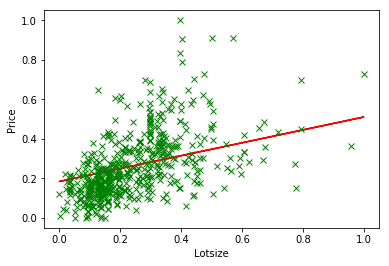

In [35]:
h = np.dot(x,w.T)
plt.plot(x[:,1],h,'r',x[:,1],y,'gx')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.show()